# Fast Gradient Sign Method (FGSM) using Cleverhans

## Implementation of the FGSM attack on a model using Cleverhans and Tensorflow 2.0


## Importing Required dependent libraries
 


In [2]:
!pip install -q tensorflow==2.0.0b1
# Install bleeding edge version of cleverhans
!pip install git+https://github.com/tensorflow/cleverhans.git#egg=cleverhans

import cleverhans
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("\nTensorflow Version: " + tf.__version__)
print("Cleverhans Version: " + cleverhans.__version__)
print("GPU Available: ", tf.test.is_gpu_available())

     |████████████████████████████████| 87.9MB 60kB/s 
     |████████████████████████████████| 3.1MB 40.6MB/s 
     |████████████████████████████████| 501kB 40.7MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
  Cloning https://github.com/tensorflow/cleverhans.git to /tmp/pip-install-8ruyqnkd/cleverhans
  Running command git clone -q https://github.com/tensorflow/cleverhans.git /tmp/pip-install-8ruyqnkd/cleverhans
     |████████████████████████████████| 163kB 2.8MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
  Created wheel for cleverhans: filename=cleverhans-3.0.1-cp36-none-any.whl size=262572 sha256=9ea60cf5240aada60aa8aeff7dcea68d4ca4bc6cab2c2cfe8916e2aca2cebbad
  Stored in directory: /tmp/pip-ephem-wheel-cache-6d0trljc/wheels/6e/59/ec/723a6f654aaf62c8c40f0f0850fdf71a4948598697f56c3bfa
Successfully built cleverhans


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 


Tensorflow Version: 2.0.0-beta1
Cleverhans Version: 3.0.1-15447acccf2628751c1e44ee30e141ec
GPU Available:  False


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

## Training a simple model on the MNIST dataset


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

num_classes = 10

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Activation(tf.nn.softmax) # We seperate the activation layer to be able to access the logits of the previous layer later
])

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, validation_split=0.2)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

11493376/11490434 [==============================] - 0s 0us/step
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 69us/sample - loss: 0.4012 - accuracy: 0.8854 - val_loss: 0.2087 - val_accuracy: 0.9409
Epoch 2/10
48000/48000 [==============================] - 3s 64us/sample - loss: 0.1973 - accuracy: 0.9422 - val_loss: 0.1697 - val_accuracy: 0.9520
Epoch 3/10
48000/48000 [==============================] - 3s 64us/sample - loss: 0.1518 - accuracy: 0.9549 - val_loss: 0.1509 - val_accuracy: 0.9560
Epoch 4/10
48000/48000 [==============================] - 3s 66us/sample - loss: 0.1267 - accuracy: 0.9621 - val_loss: 0.1354 - val_accuracy: 0.9613
Epoch 5/10
48000/48000 [==============================] - 3s 65us/sample - loss: 0.1100 - accuracy: 0.9669 - val_loss: 0.1307 - val_accuracy: 0.9620
Epoch 6/10
48000/48000 [======================

## Implementing the FGSM attack using fast_gradient_method()


Cleverhans implements the fgsm attack with the following method:


```
fast_gradient_method(model_fn, x, eps, norm, clip_min=None, clip_max=None, y=None, targeted=False, sanity_checks=False)

```


In [10]:
# Import the attack
from cleverhans.future.tf2.attacks import fast_gradient_method

#The attack requires the model to ouput the logits (which are helpful in prediction decisions normally probability score in classification problems)
logits_model = tf.keras.Model(model.input,model.layers[-1].output)

### Choose a random image to attack from the test set



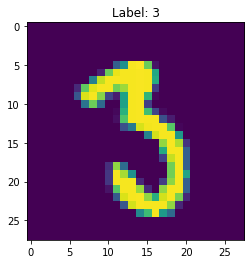

In [11]:
random_index = np.random.randint(test_images.shape[0])

original_image = test_images[random_index]
original_image = tf.convert_to_tensor(original_image.reshape((1,28,28)))

original_label = test_labels[random_index]
original_label = np.reshape(original_label, (1,)).astype('int64')

#Show the image
plt.figure()
plt.grid(False)

plt.imshow(np.reshape(original_image, (28,28)))
plt.title("Label: {}".format(original_label[0]))

plt.show()

### Non-targeted FGSM attack 

### Attacker tries to make the classifier predict wrong output


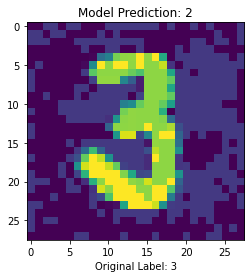

In [8]:
epsilon = 0.1

adv_example_untargeted_label = fast_gradient_method(logits_model, original_image, epsilon, np.inf, targeted=False)

adv_example_untargeted_label_pred = model.predict(adv_example_untargeted_label)

#Show the image
plt.figure()
plt.grid(False)

plt.imshow(np.reshape(adv_example_untargeted_label, (28,28)))
plt.title("Model Prediction: {}".format(np.argmax(adv_example_untargeted_label_pred)))
plt.xlabel("Original Label: {}".format(original_label[0]))

plt.show()

### Targeted FGSM Attack
### A difficult attack which aims to receive a particular class for attackers input

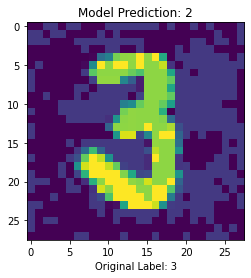

In [9]:
epsilon = 0.1
# The target value may have to be changed to work, some images are more easily missclassified as different labels
target = 2

target_label = np.reshape(target, (1,)).astype('int64') # Give target label proper size and dtype to feed through

adv_example_targeted_label = fast_gradient_method(logits_model, original_image, epsilon, np.inf, y=target_label, targeted=True)

adv_example_targeted_label_pred = model.predict(adv_example_targeted_label)

#Show the image
plt.figure()
plt.grid(False)

plt.imshow(np.reshape(adv_example_targeted_label, (28,28)))
plt.title("Model Prediction: {}".format(np.argmax(adv_example_targeted_label_pred)))
plt.xlabel("Original Label: {}".format(original_label[0]))

plt.show()